In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('aggregated-accuracy-report.csv', delim_whitespace=True).set_index('language')
data = data.reindex(sorted(data.columns), axis=1)
data

,average-lingua,average-optimaize,average-tika,sentences-lingua,sentences-optimaize,sentences-tika,single-words-lingua,single-words-optimaize,single-words-tika,word-pairs-lingua,word-pairs-optimaize,word-pairs-tika
language,,,,,,,,,,,,
Arabic,98.433333,90.833333,97.800000,99.800000,99.800000,100.000000,96.8,77.2,94.7,98.7,95.5,98.7
Belarusian,97.766667,91.233333,97.866667,99.200000,99.500000,99.800000,95.0,78.4,94.9,99.1,95.8,98.9
Bulgarian,93.800000,57.700000,88.833333,98.900000,96.800000,99.100000,87.1,25.0,78.6,95.4,51.3,88.8
Croatian,90.566667,70.133333,89.233333,99.100000,99.100000,100.000000,78.5,35.0,75.4,94.1,76.3,92.3
Czech,83.633333,71.333333,82.866667,93.300000,89.300000,93.000000,72.2,49.0,69.5,85.4,75.7,86.1
Danish,89.033333,58.433333,84.700000,99.700000,96.600000,98.900000,75.5,23.7,67.7,91.9,55.0,87.5
Dutch,85.200000,51.366667,72.133333,98.200000,97.600000,99.200000,68.5,14.2,46.3,88.9,42.3,70.9
English,84.766466,43.365699,67.599733,99.399399,97.097097,99.199199,64.6,5.3,37.2,90.3,27.7,66.4
Estonian,92.833333,63.500000,87.166667,99.600000,97.900000,99.600000,83.6,26.3,71.8,95.3,66.3,90.1


In [3]:
data.mean()

average-lingua            90.502769
average-optimaize         64.862460
average-tika              83.466656
sentences-lingua          98.308308
sentences-optimaize       96.745712
sentences-tika            98.733300
single-words-lingua       80.041667
single-words-optimaize    35.495833
single-words-tika         67.308333
word-pairs-lingua         93.158333
word-pairs-optimaize      62.345833
word-pairs-tika           84.358333
dtype: float64

In [4]:
data.std()

average-lingua             5.578313
average-optimaize         15.252592
average-tika               9.707952
sentences-lingua           2.384525
sentences-optimaize        3.093595
sentences-tika             1.620958
single-words-lingua       10.795930
single-words-optimaize    21.692485
single-words-tika         17.009739
word-pairs-lingua          5.401201
word-pairs-optimaize      23.293664
word-pairs-tika           11.992132
dtype: float64

In [5]:
data.median()

average-lingua            91.200000
average-optimaize         63.683333
average-tika              85.850000
sentences-lingua          99.200000
sentences-optimaize       97.700000
sentences-tika            99.300000
single-words-lingua       80.750000
single-words-optimaize    30.350000
single-words-tika         71.300000
word-pairs-lingua         95.150000
word-pairs-optimaize      66.600000
word-pairs-tika           87.400000
dtype: float64

In [6]:
### LINE PLOT CREATION ###
def create_lineplot(data, columns, title, ylim):
    filtered_data = data.loc[:, columns]
    
    plt.figure(figsize=(28,10))
    plt.title(title, fontsize=26, fontweight='bold')
    plt.xticks(rotation=45, fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.grid(color='#A6A6A6')
    
    ax = sns.lineplot(data=filtered_data, linewidth=5, palette=['green', 'orange', 'red'])
    ax.set_ylim(ylim)
    ax.legend(labels=['Lingua', 'Tika', 'Optimaize'], fontsize='xx-large')
    ax.set_xlabel('Language', fontsize=22, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=22, fontweight='bold')

    plt.show()
    
### BOX PLOT CREATION ###    
def create_boxplot(data, columns, title, ylim):
    filtered_data = data.loc[:, columns]

    plt.figure(figsize=(28,10))
    plt.title(title, fontsize=26, fontweight='bold')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.grid(color='#A6A6A6')

    ax = sns.boxplot(data=filtered_data, linewidth=5, palette=['red', 'orange', 'green'])
    ax.set_ylim(ylim)
    ax.set_xlabel('Classifier', fontsize=22, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=22, fontweight='bold')
    ax.set_xticklabels(['Optimaize', 'Tika', 'Lingua'])

    plt.show()

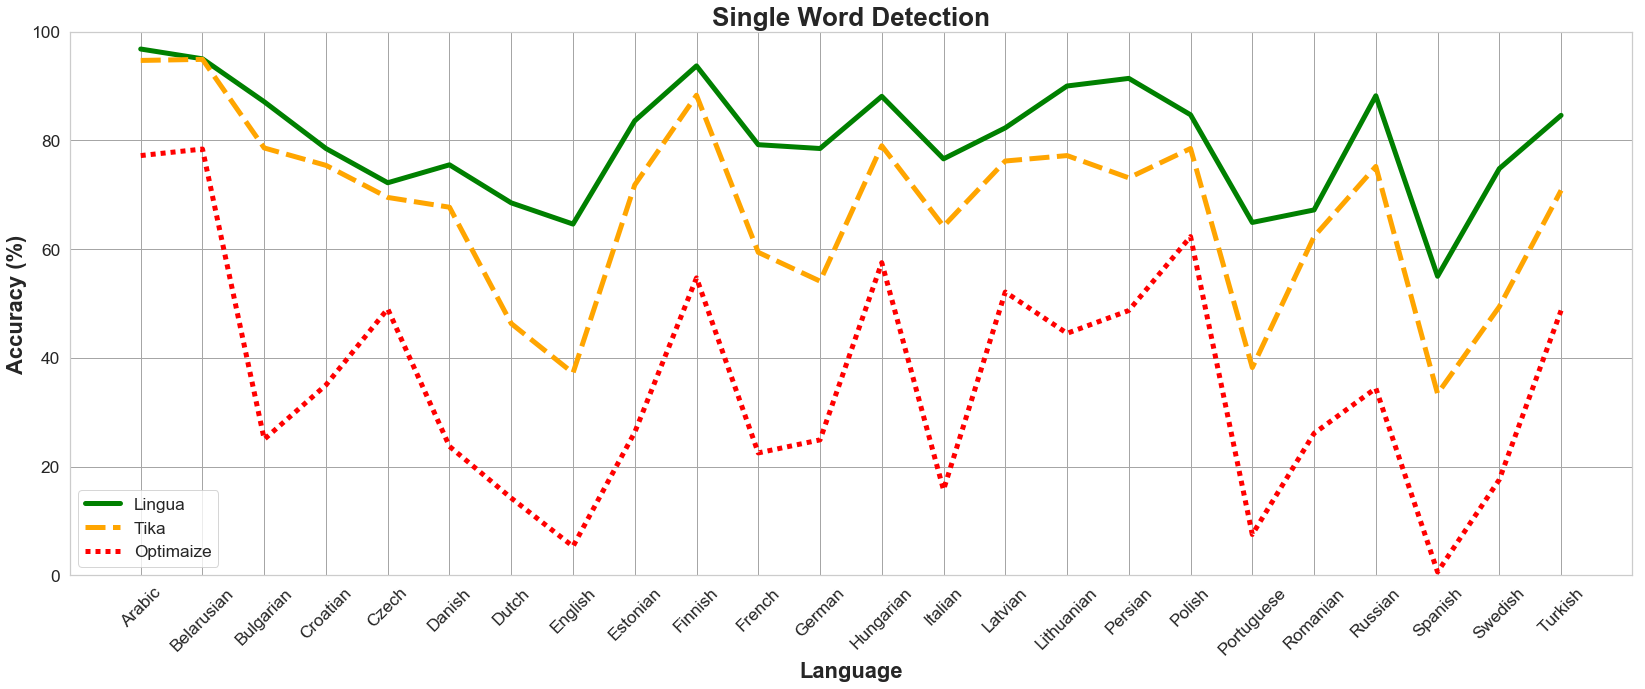

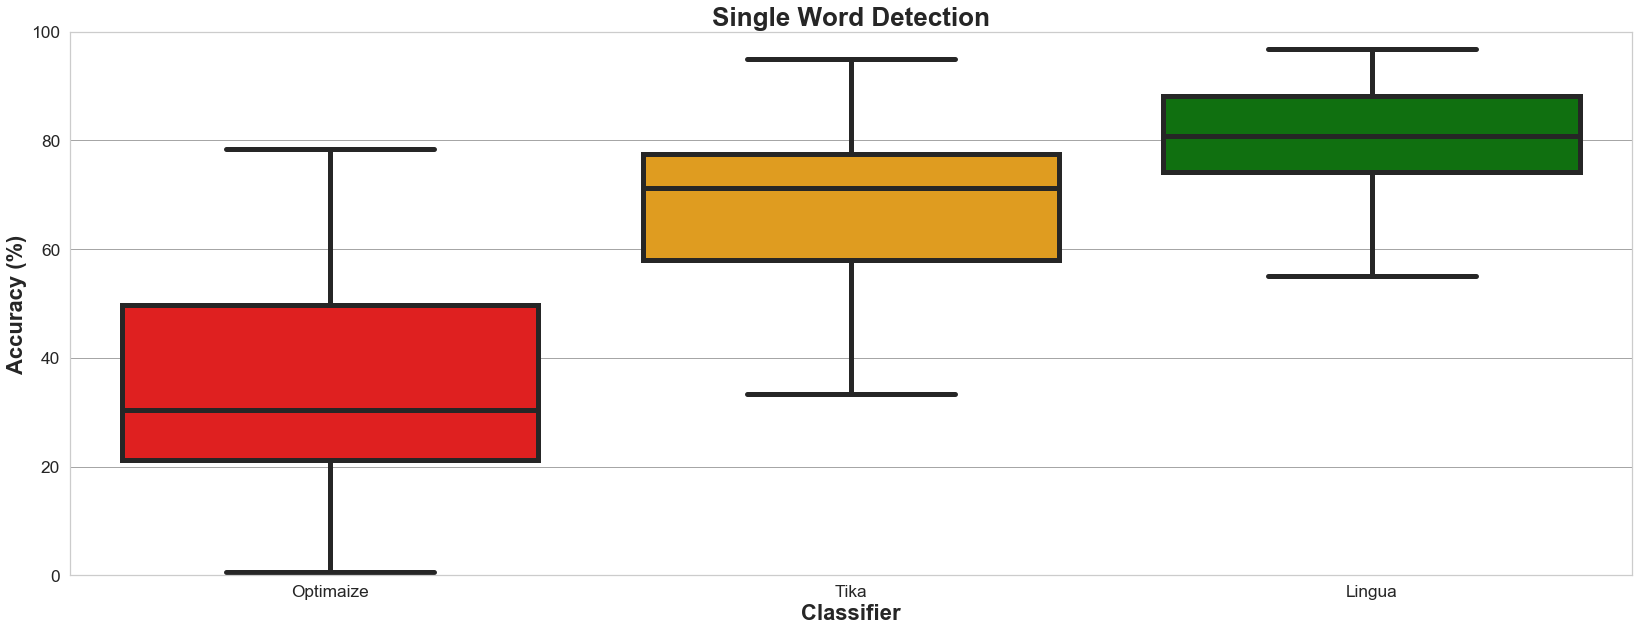

In [7]:
### SINGLE WORD DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['single-words-lingua', 'single-words-tika', 'single-words-optimaize'], 
    title='Single Word Detection',
    ylim=[0,100]
)

create_boxplot(
    data=data,
    columns=['single-words-optimaize', 'single-words-tika', 'single-words-lingua'],
    title='Single Word Detection',
    ylim=[0,100]
)

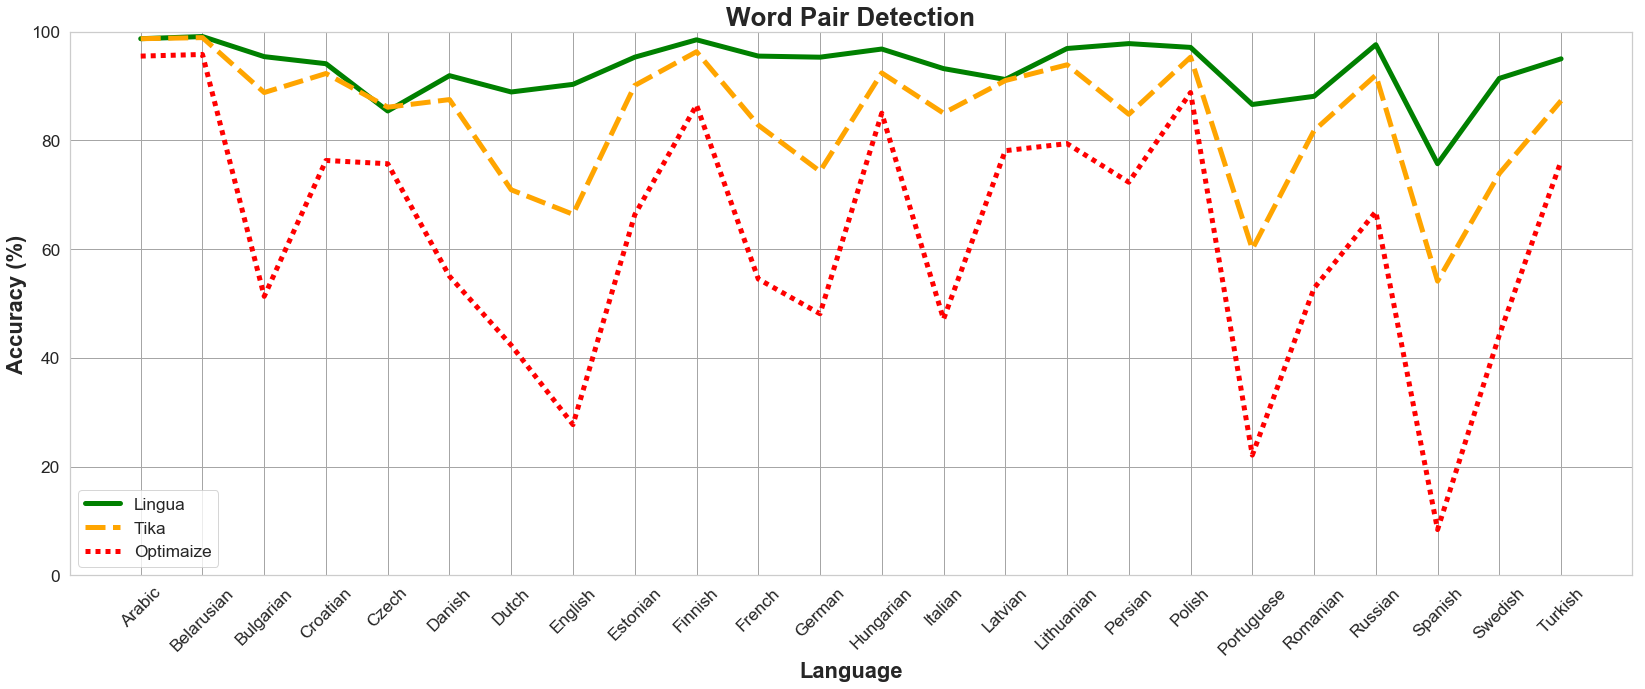

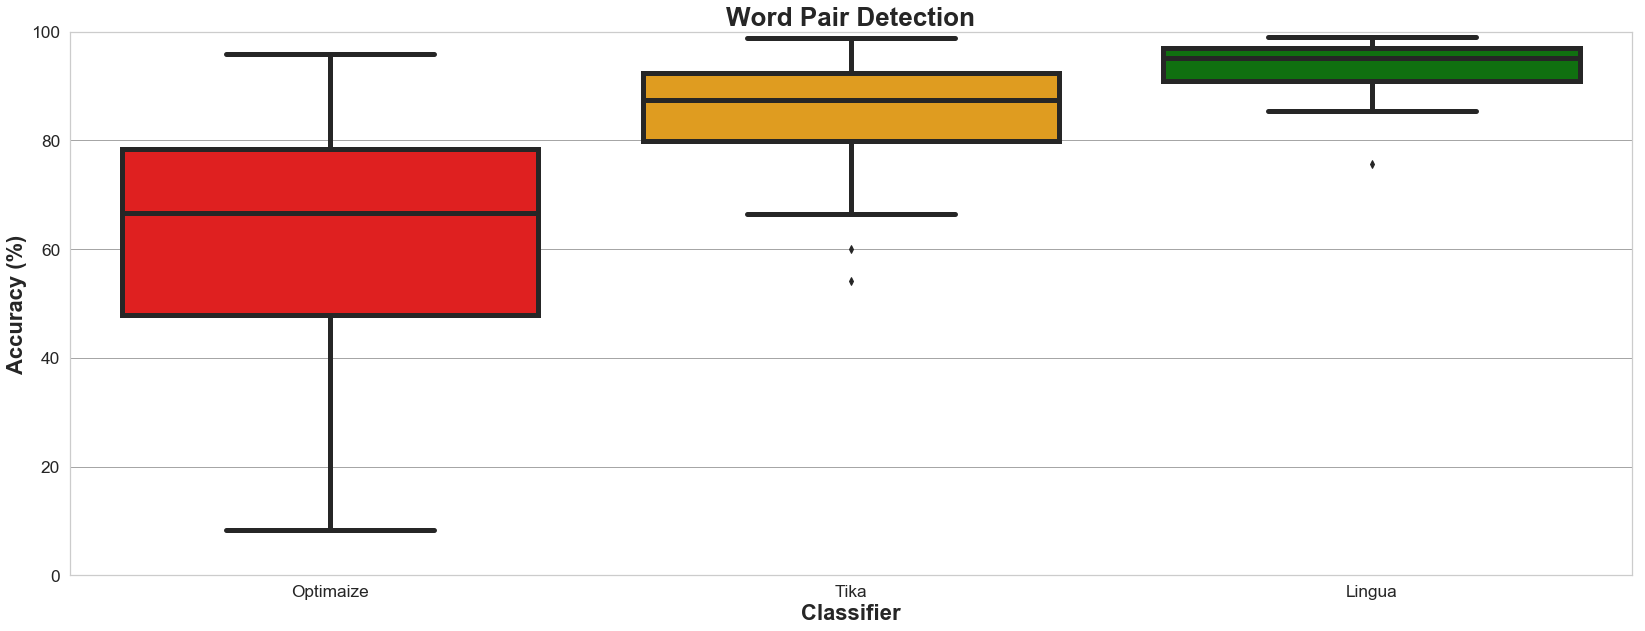

In [8]:
### WORD PAIR DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['word-pairs-lingua', 'word-pairs-tika', 'word-pairs-optimaize'], 
    title='Word Pair Detection',
    ylim=[0,100]
)

create_boxplot(
    data=data,
    columns=['word-pairs-optimaize', 'word-pairs-tika', 'word-pairs-lingua'],
    title='Word Pair Detection',
    ylim=[0,100]
)

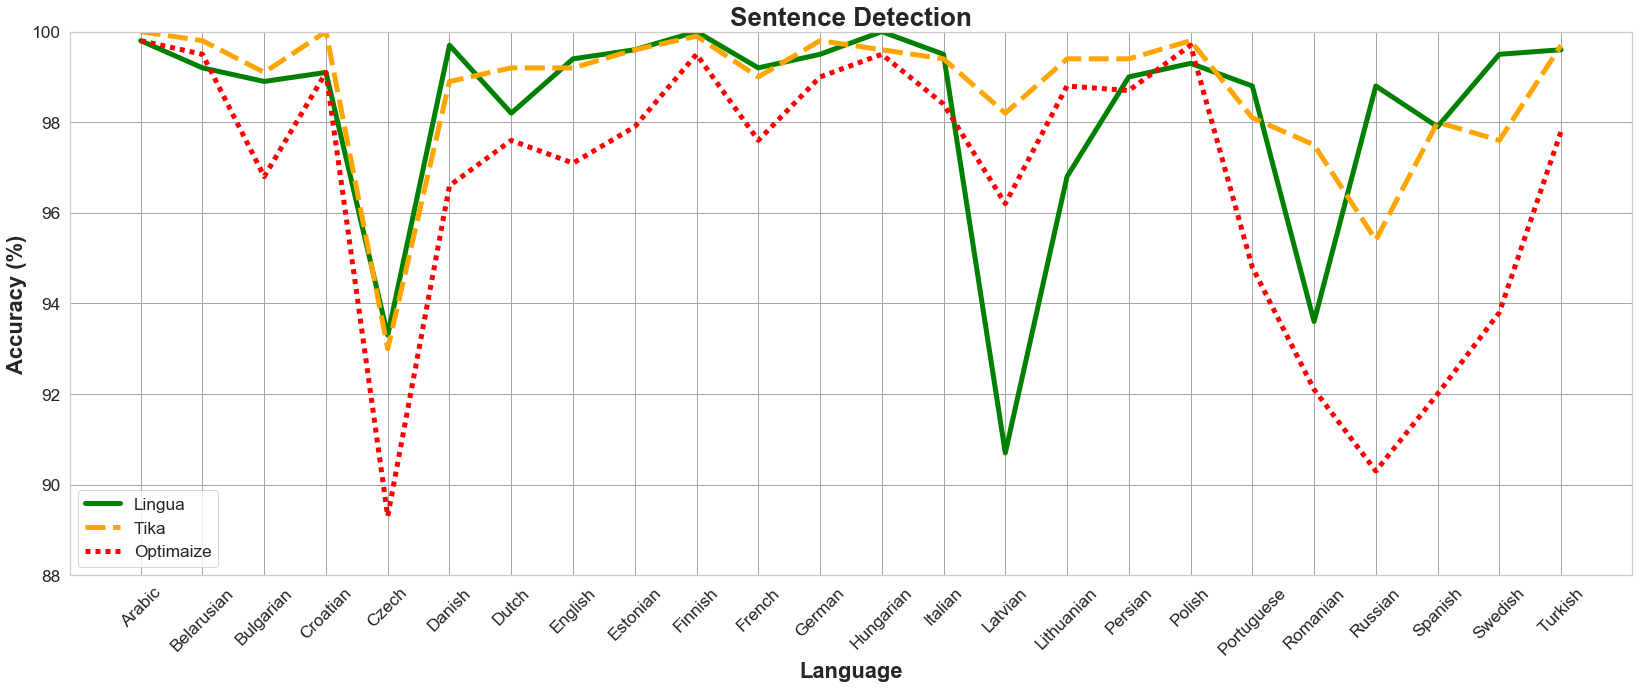

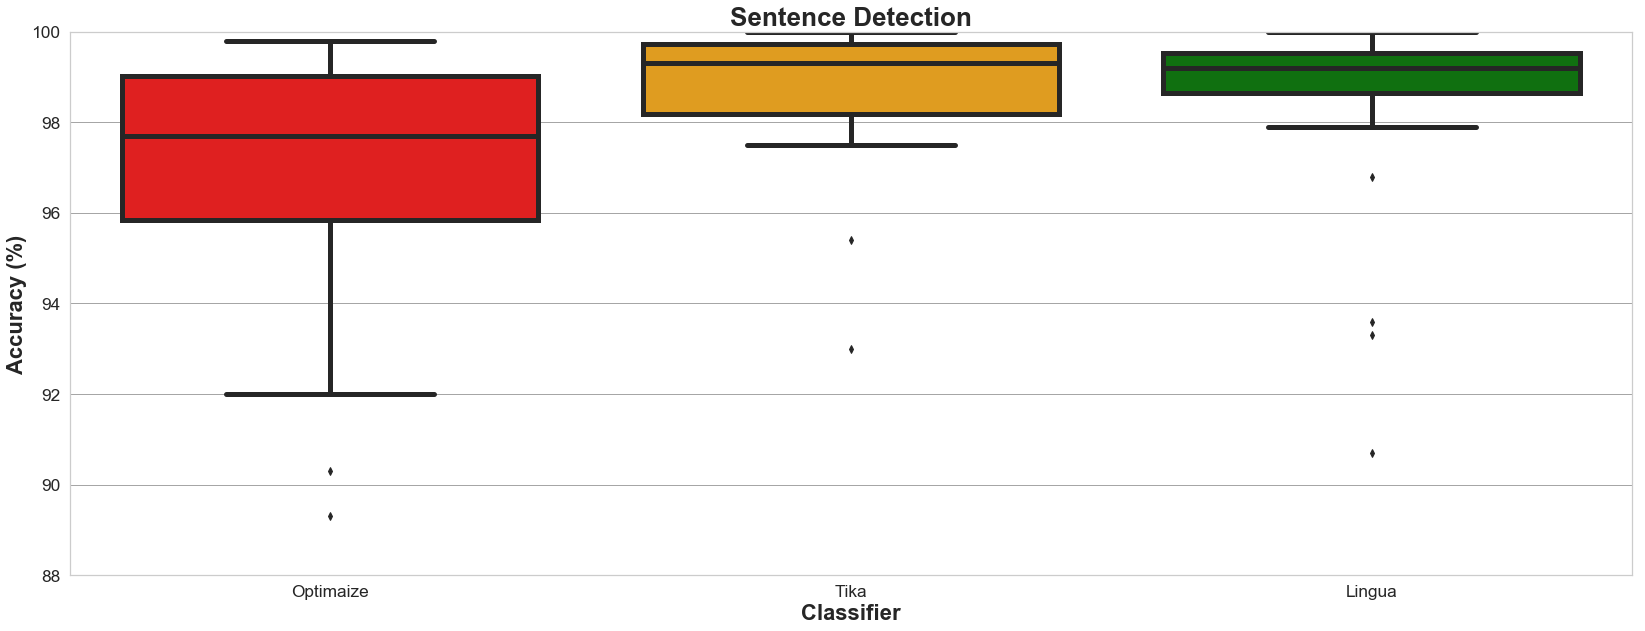

In [9]:
### SENTENCE DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['sentences-lingua', 'sentences-tika', 'sentences-optimaize'], 
    title='Sentence Detection',
    ylim=[88,100]
)

create_boxplot(
    data=data,
    columns=['sentences-optimaize', 'sentences-tika', 'sentences-lingua'],
    title='Sentence Detection',
    ylim=[88,100]
)

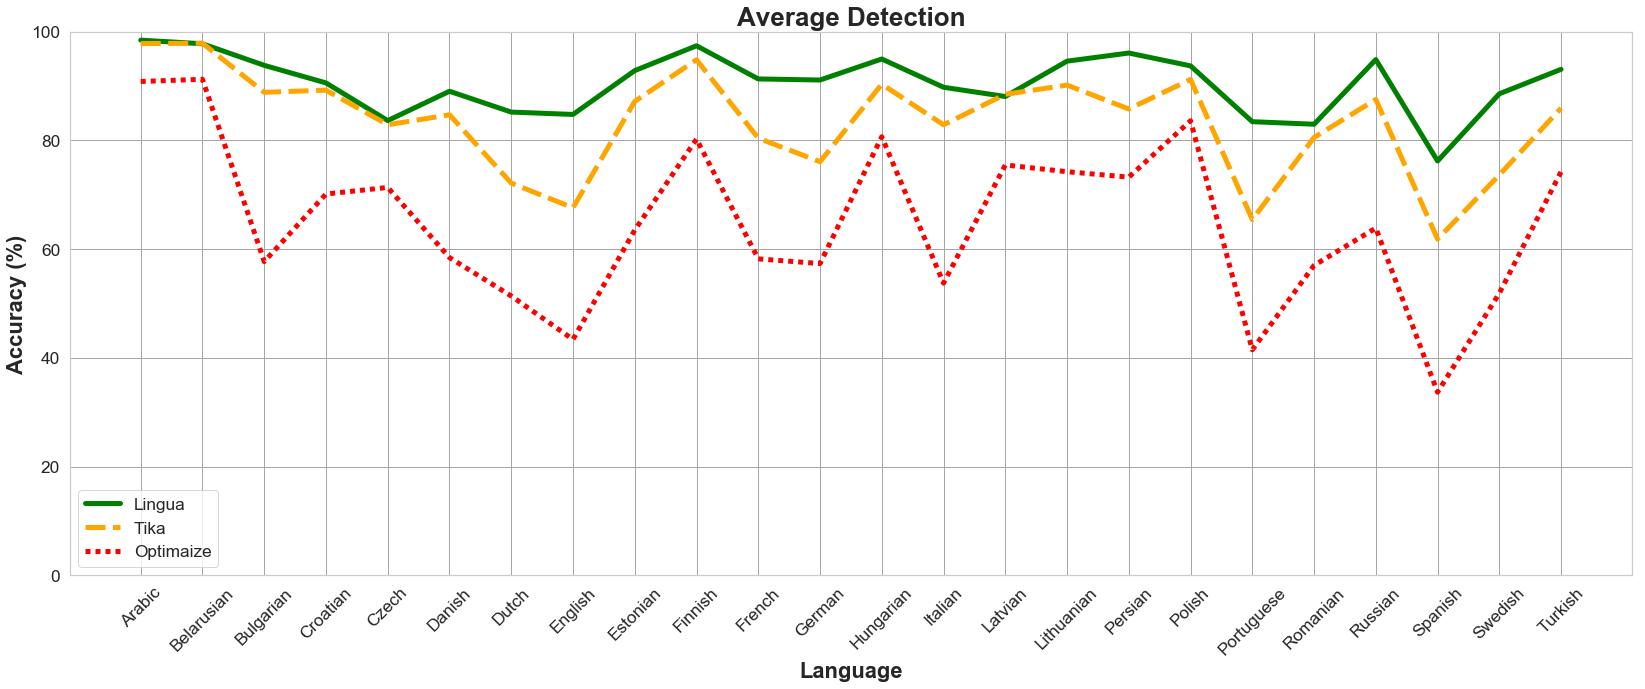

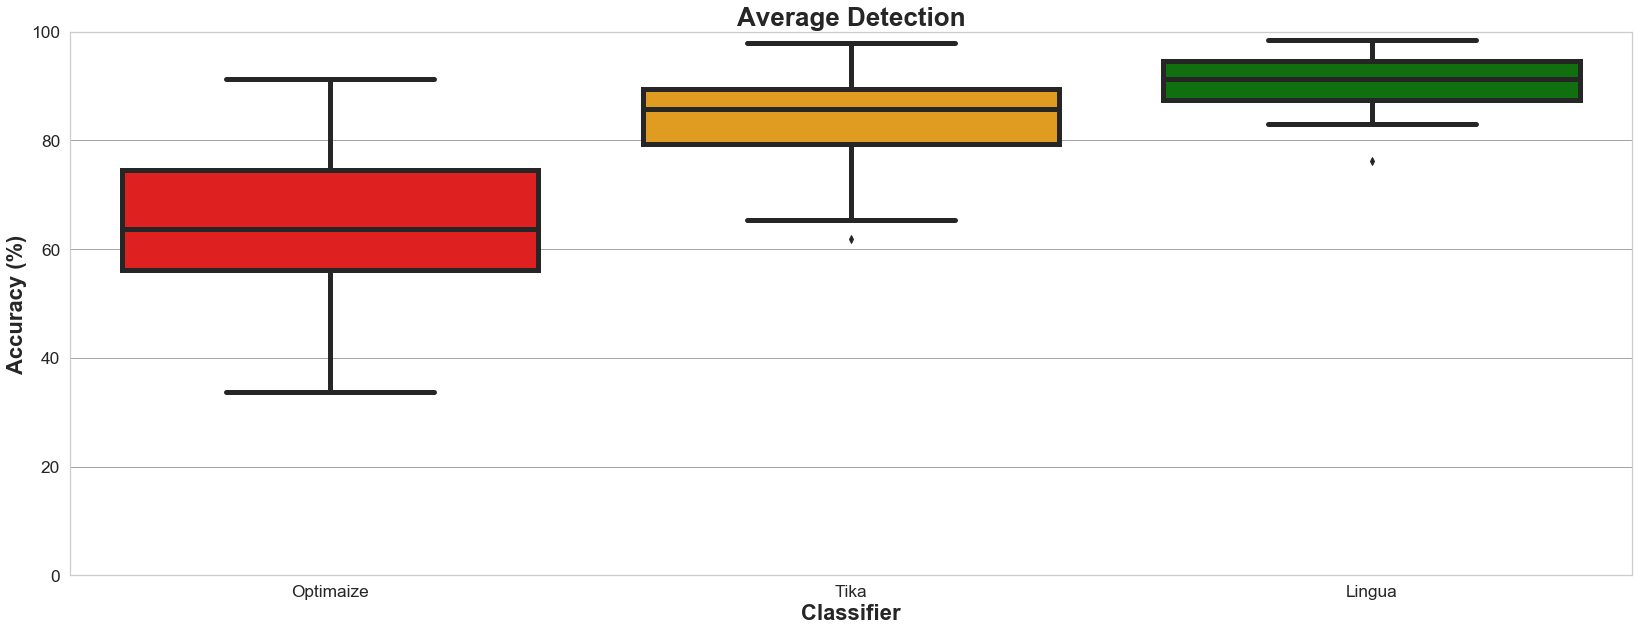

In [10]:
### AVERAGE DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['average-lingua', 'average-tika', 'average-optimaize'], 
    title='Average Detection',
    ylim=[0,100]
)

create_boxplot(
    data=data,
    columns=['average-optimaize', 'average-tika', 'average-lingua'],
    title='Average Detection',
    ylim=[0,100]
)